In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("diabetes.csv")  
X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:

abc = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)


In [11]:

abc.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [12]:
y_pred = abc.predict(X_test)


In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.7337662337662337
Confusion Matrix:
 [[78 21]
 [20 35]]
Precision: 0.7348760932944607
Recall: 0.7337662337662337
F1 Score: 0.7342897647466174


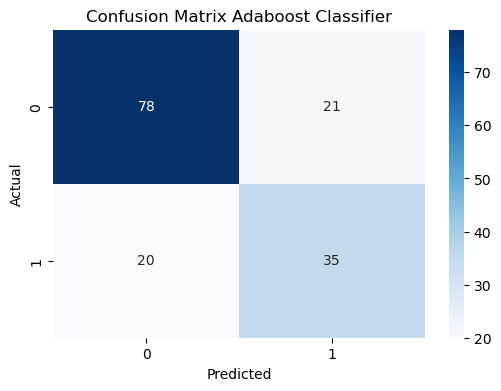

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=abc.classes_,
            yticklabels=abc.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Adaboost Classifier")
plt.show()

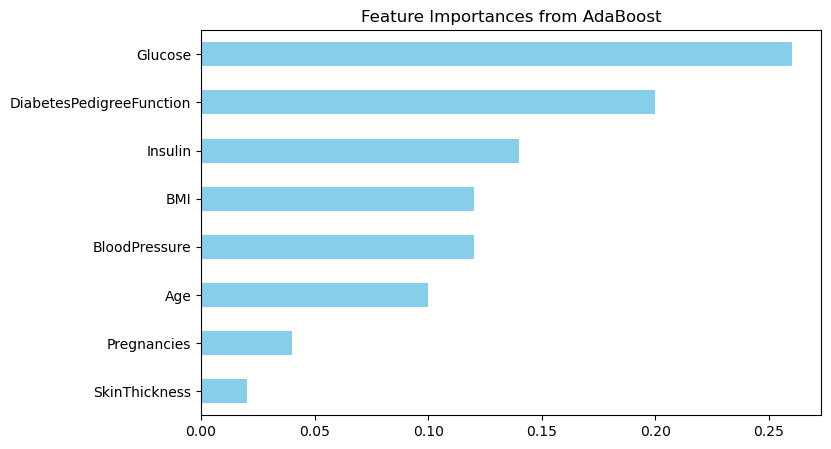

In [17]:
feature_importances = pd.Series(abc.feature_importances_, index=data.columns[:-1])
plt.figure(figsize=(8,5))
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importances from AdaBoost")
plt.show()